#### vizualiz_augmentation

In [ ]:
def vizualiz_augmentation(outputs,im):
    
    v = Visualizer(im[:, :, ::-1],
                   MetadataCatalog.get(cfg.DATASETS.TEST[0]),
                   scale=1,
                   instance_mode=ColorMode.SEGMENTATION)
    
    classes = outputs["instances"].gt_classes.to('cpu').tolist()
    
    boxes = v._convert_boxes(outputs["instances"].gt_boxes.to('cpu')).squeeze()
    scores = classes
    labels = _create_text_labels(classes, scores, ['cycloff', 'bibron', 'cortéma', 'laroche_posay','soulagel', 'sucette'])
    if len(labels) != 1:

        for box, label in zip(boxes, labels):
            color = random_color(rgb=True, maximum=1)
            color = v._change_color_brightness(color, 0.5)
            out = v.draw_box(box, edge_color=color)
            
            out = v.draw_text(
                f"{label}", (box[0]+(box[2]-box[0])/2, box[1]), horizontal_alignment="center", font_size=45)
           
    else:
        label = labels[0]
        color = random_color(rgb=True, maximum=1)
        color=v._change_color_brightness(color,0.5)
        out=v.draw_box(boxes,edge_color=color)
        out = v.draw_text(f"{label}", (boxes[0]+(boxes[2]-boxes[0])/2,
                                 boxes[1]), horizontal_alignment="center", font_size=45)
    img = cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(img)

In [ ]:
def viz_dict(outputs,im): # read annotaion in XYXY format if rwron the coords in XYWH
  v = Visualizer(im[:, :, ::-1],
                   MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
                   scale=1,
                   instance_mode=ColorMode.SEGMENTATION)
  classes = []
  boxes = []
  scores=[]
  if len(outputs["annotations"]) !=1:
    for d in outputs["annotations"]:
      classes.append(d["category_id"])
      boxes.append(d['bbox'])
      scores.append(0)
  else:
    d = outputs["annotations"][0]
    classes.append(d["category_id"])
    boxes = d['bbox']
    scores.append(0)
  labels = _create_text_labels(classes, scores, ['cycloff', 'bibron', 'cortéma', 'laroche_posay','soulagel', 'sucette'])
  
  if len(labels) != 1:
      for box, label in zip(boxes, labels):
          color = random_color(rgb=True, maximum=1)
          color = v._change_color_brightness(color, 0.5)
          out = v.draw_box(box, edge_color=color)
          out = v.draw_text(f"{label}", (box[0]+(box[2]-box[0])/2, box[1]), horizontal_alignment="center", font_size=45)
          
  else:
      label = labels[0]
      color = random_color(rgb=True, maximum=1)
      color=v._change_color_brightness(color,0.5)
      out=v.draw_box(boxes,edge_color=color)
      out = v.draw_text(f"{label}", (boxes[0]+(boxes[2]-boxes[0])/2,
                                boxes[1]), horizontal_alignment="center", font_size=45)
  img = cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(10, 8))
  plt.axis('off')
  plt.imshow(img)

#### vizualize GT in test set

In [ ]:
dict_1[0]['annotations']

[{'iscrowd': 0,
  'bbox': [1116, 1245, 2500, 2935],
  'category_id': 4,
  'bbox_mode': 0}]

In [ ]:
#dict_1 = random.sample(dict_test, 1)
for d in dict_1[0]['annotations']:
  d['bbox_mode'] = 0
  x1,y1,x2,y2 = d['bbox']
  w,h = x2-x1 , y2-y1
  x2 = x1 + 2*w
  y2 = y1 + 2*h
  d['bbox'] = [x1,y1,x2,y2]
im = cv2.imread(dict_1[0]["file_name"])
v = Visualizer(im[:, :, ::-1],
                   MetadataCatalog.get(cfg.DATASETS.TEST[0]),
                   scale=1,
                   instance_mode=ColorMode.SEGMENTATION)
#output , imgtr = custom_mapper(dict_1,im)
#vizualiz_augmentation(output, imgtr)
out = v.draw_dataset_dict(dict_1[0])
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
dict_test[0]

{'file_name': './data/test/0531.jpg',
 'height': 2400,
 'width': 2100,
 'image_id': 531,
 'annotations': [{'iscrowd': 0,
   'bbox': [578, 539, 1473, 1772],
   'category_id': 1,
   'bbox_mode': 0}]}

In [ ]:
bibron

{'file_name': './data/test/0531.jpg',
 'height': 2400,
 'width': 2100,
 'image_id': 531,
 'annotations': [{'iscrowd': 0,
   'bbox': [578, 539, 1473, 1772],
   'category_id': 1,
   'bbox_mode': 1}]}

In [ ]:
dct['instances'].gt_boxes

Boxes(tensor([[ 578.,  539., 1473., 1772.]]))

In [ ]:
dict_test[0]
bibron = copy.deepcopy(dict_test[0])
x,y,w,h = bibron['annotations'][0]['bbox'] #coco 
bibron['annotations'][0]['bbox'] = [x,y,x+w,y+h] #voc 

In [ ]:
for i in range(len(dict_test[:12])):
  dct, im = custom_mapper(dict_test[i],0,0)
  vizualiz_augmentation(dct,im) # display annotaion in voc format
  viz_dict(dict_test[i],im)  # display annotaions in voc format  if wron then it's coco format 

In [ ]:
#clas_lst= ['cycloff', 'bibron', 'cortema', 'laroche_posay', 'soulagel', 'sucette']
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for dct in dict_test:
  for d in dct['annotations']:
    x,y,w,h= d['bbox']
    d['bbox'] = [x,y,x+w,y+h]
    d['bbox_mode'] = 0

In [ ]:
#with open('/content/drive/MyDrive/pharmacy/data/test.json','w') as dp:
#  json.dump(dict_test,dp)

In [ ]:
#cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
cfg.MODEL.WEIGHTS = "./model_0005247.pth"
  # set a custom testing threshold
#predictor = DefaultPredictor(cfg)

In [ ]:
cfg.OUTPUT_DIR

'./logs'

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator(data_test_name,tasks=("bbox",),output_dir="./data/dict_result")

val_loader = build_detection_test_loader(cfg, "data_test")

data = inference_on_dataset(predictor.model, val_loader, evaluator)

print(data)
with open('./data/dict_result/old_model5247.json', 'w') as fp:
        json.dump(data, fp)

[10/13 06:36:18 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=800, sample_style='choice')]
[10/13 06:36:18 d2.data.common]: Serializing 54 elements to byte tensors and concatenating them all ...
[10/13 06:36:18 d2.data.common]: Serialized dataset takes 0.01 MiB
[10/13 06:36:18 d2.evaluation.evaluator]: Start inference on 54 batches


/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


[10/13 06:36:19 d2.evaluation.evaluator]: Inference done 11/54. Dataloading: 0.0131 s/iter. Inference: 0.0282 s/iter. Eval: 0.0002 s/iter. Total: 0.0416 s/iter. ETA=0:00:01
[10/13 06:36:21 d2.evaluation.evaluator]: Total inference time: 0:00:02.641893 (0.053916 s / iter per device, on 1 devices)
[10/13 06:36:21 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.028473 s / iter per device, on 1 devices)
[10/13 06:36:21 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[10/13 06:36:21 d2.evaluation.coco_evaluation]: Saving results to ./data/dict_result/coco_instances_results.json
[10/13 06:36:21 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[10/13 06:36:21 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[10/13 06:36:21 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[10/13 06:36:21 d2.e

###**Random visual predictions**

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_0017009.pth")
#cfg.MODEL.WEIGHTS = "./model_0005247.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)
for file_path in glob.glob("./data/test_synthetic/*.jpg"):
  im = cv2.imread(file_path)
  #im= im.astype(float)
  print("img shapes", im.shape)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                  MetadataCatalog.get(cfg.DATASETS.TEST[0]),
                  scale=1,
                  instance_mode=ColorMode.SEGMENTATION)
  
  classes = outputs["instances"].pred_classes.to('cpu').tolist()
  
  boxes = v._convert_boxes(outputs["instances"].pred_boxes.to('cpu')).squeeze()
  scores = outputs["instances"].scores.to('cpu').tolist()
  labels = _create_text_labels(classes, scores, ['cycloff', 'bibron', 'cortéma', 'laroche_posay','soulagel', 'sucette'])
  
  if len(labels) != 1:
    for box, label in zip(boxes, labels):
        color = random_color(rgb=True, maximum=1)
        color = v._change_color_brightness(color, 0.5)
        out = v.draw_box(box, edge_color=color)
        #out = v.draw_binary_mask(mask, color=color, text=None)
        out = v.draw_text(f"{label}", (box[0]+(box[2]-box[0])/2, box[1]), horizontal_alignment="center", font_size=45)
        # out=v.draw_mask(m)   
  else:
    label = labels[0]
    color = random_color(rgb=True, maximum=1)
    color=v._change_color_brightness(color,0.5)
    out=v.draw_box(boxes,edge_color=color)
    out = v.draw_text(f"{label}", (boxes[0]+(boxes[2]-boxes[0])/2,
                              boxes[1]), horizontal_alignment="center", font_size=45)
  img = cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
  #img= out.get_image()[:, :, ::-1]
  plt.figure(figsize=(10, 8))
  plt.axis('off')
  plt.imshow(img)
  img= Image.fromarray(img,'RGB')
  path = file_path.replace('test_synthetic','visual_pred_synthetic')
  img.save(path)
  #plt.imsave(img,file_path.replace('random_tests','random_predictions'))

In [ ]:
for file_path in glob.glob("./data/visual_test_imgs/random_predictions/cropped/*.jpg"):
  im2 = Image.open(file_path)
  im1 = Image.open(file_path.replace('cropped','cropped1'))
  im1 = np.uint8(im1)
  im2 = np.uint8(im2)
  combined = np.concatenate((im1,im2),axis = 1)
  display(Image.fromarray(combined))
  Image.fromarray(combined).save(file_path.replace("cropped","comparaison"))

In [ ]:
for file_path in glob.glob(("./data/visual_test_imgs/random_predictions/cropped/*.jpg")):
  

In [ ]:
plt.imsave(img,file_path.replace('random_tests','random_predictions'))

In [ ]:
file_path.replace('random_tests','random_predictions')

In [ ]:
./data/visual_test_imgs/random_predictions/multi_class

In [ ]:
im = cv2.imread(file_path)
see_me(im)

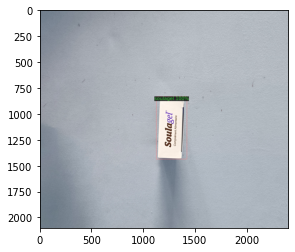

In [ ]:
plt.imshow(out.get_image()[:, :, ::-1])

In [ ]:
def see_me(img):
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(img)
    plt.show()

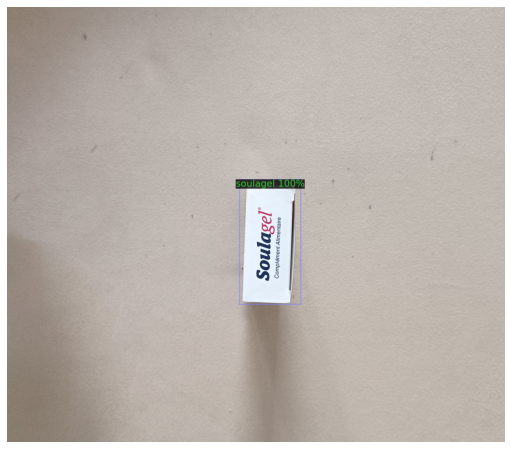

In [ ]:
img = cv2.cvtColor(np.uint8(out.get_image()[:, :, ::-1]), cv2.COLOR_BGR2RGB)
see_me(img)

### fetching checkpoints 

In [ ]:
import glob

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator(data_test_name,tasks=("bbox",),output_dir="./data/dict_result4",)
data_total={}
for file in glob.glob("./logs/*.pth"):
    model_name = file.split('/')[-1]
    model_path = file
    
    cfg.MODEL.WEIGHTS = model_path
    predictor = DefaultPredictor(cfg)
    val_loader = build_detection_test_loader(cfg, data_test_name)
    data = inference_on_dataset(predictor.model, val_loader, evaluator)
    data_total[model_name]=data["bbox"]
with open('./data/dict_result4/4th_SynthTest_LGTR_models_AP_20_10_'+'.json', 'w') as fp:
    json.dump(data_total, fp)

In [ ]:
with open("./data/dict_result4/4th_SynthTest_LGTR_models_AP_20_10_.json","r") as f:
    alpha= json.load(f)
    AP50_dict={}
    for key in alpha.keys():
        
        AP50_dict[key]= alpha[key]['AP']
    max_AP = max(AP50_dict, key= lambda x: AP50_dict[x])
    print('best model in fold is', max_AP, ' AP=',AP50_dict[max_AP], '\n',"model_dict",alpha[max_AP])

best model in fold is model_0017009.pth  AP= 74.2403956741828 
 model_dict {'AP': 74.2403956741828, 'AP50': 99.72153465346535, 'AP75': 89.86485873862111, 'APs': nan, 'APm': nan, 'APl': 74.2403956741828, 'AP-cycloff': 83.15774434586316, 'AP-bibron': 88.10891089108911, 'AP-cortéma': 71.79152915291529, 'AP-laroche_posay': 72.90081824116477, 'AP-soulagel': 68.67479055597869, 'AP-sucette': 60.80858085808581}


with theresh = 0.7 best model in fold is model_0012459.pth  AP50 = 27.830180682319277 
{'AP': 21.889799209049865,
 'AP50': 27.830180682319277,
 'AP75': 24.508191758457727,
 'APs': nan,
 'APm': nan,
 'APl': 21.889799209049865,
 'AP-cycloff': 49.7091654417121,
 'AP-bibron': 0.8090470249894245,
 'AP-cortéma': 17.24081140850658,
 'AP-laroche_posay': 20.677509662730976,
 'AP-soulagel': 8.915252239509664,
 'AP-sucette': 33.98700947685046}**bold text**

In [ ]:
alpha[max_AP]

{'AP': 74.2403956741828,
 'AP50': 99.72153465346535,
 'AP75': 89.86485873862111,
 'APs': nan,
 'APm': nan,
 'APl': 74.2403956741828,
 'AP-cycloff': 83.15774434586316,
 'AP-bibron': 88.10891089108911,
 'AP-cortéma': 71.79152915291529,
 'AP-laroche_posay': 72.90081824116477,
 'AP-soulagel': 68.67479055597869,
 'AP-sucette': 60.80858085808581}

with thresh = 0.5
best model in fold is model_0012459.pth  AP50 = 27.830180682319277 


 model_dict {'AP': 21.889799209049865, 
            'AP50': 27.830180682319277, 
            'AP75': 24.508191758457727, 
            'APs': nan, 
            'APm': nan, 
            'APl': 21.889799209049865, 
            'AP-cycloff': 49.7091654417121, 
            'AP-bibron': 0.8090470249894245, 
            'AP-cortéma': 17.24081140850658, 
            'AP-laroche_posay': 20.677509662730976
            'AP-soulagel': 8.915252239509664, 
            'AP-sucette': 33.98700947685046}


on old test set 52 img with thresh = 0.5
best model in fold is model_0016375.pth  AP50 = 83.84825877545737 


In [ ]:
alpha[max_AP]

{'AP': 72.00540327141958,
 'AP50': 83.84825877545737,
 'AP75': 78.62403047027391,
 'APs': nan,
 'APm': nan,
 'APl': 72.00540327141958,
 'AP-cycloff': 68.98514851485147,
 'AP-bibron': 28.995923121723937,
 'AP-cortéma': 82.10891089108911,
 'AP-laroche_posay': 92.12138356692812,
 'AP-soulagel': 87.93279327932795,
 'AP-sucette': 71.88826025459689}

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_0017009.pth")  
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator(data_test_name,tasks=("bbox",),output_dir="./data/dict_result4",)
data_total={}
predictor = DefaultPredictor(cfg)
#thsh=[0,0.2,0.3,0.5,0.7,0.8,0.9,1]
for t in np.arange(0.3, 0.99, 0.05):
  cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = np.float(t)
  thresh_name='threshold_' + str(t)
  predictor = DefaultPredictor(cfg)
  evaluator = COCOEvaluator(data_test_name)
  val_loader = build_detection_test_loader(cfg, data_test_name)
  data = inference_on_dataset(predictor.model, val_loader, evaluator)
  data_total[thresh_name] = data

with open('./data/dict_result/Thrsh_Tst_LGTR_models_AP_13_10_'+str(t)+'.json', 'w') as fp:
  json.dump(data_total, fp)

In [ ]:
with open('./data/dict_result/Thrsh_Tst_LGTR_models_AP_13_10_'+str(t)+'.json', 'w') as fp:
  json.dump(data_total, fp)

In [ ]:
data_total.keys()

dict_keys(['threshold_0.3', 'threshold_0.35', 'threshold_0.39999999999999997', 'threshold_0.44999999999999996', 'threshold_0.49999999999999994', 'threshold_0.5499999999999999', 'threshold_0.5999999999999999', 'threshold_0.6499999999999999', 'threshold_0.7', 'threshold_0.7499999999999999', 'threshold_0.7999999999999998', 'threshold_0.8499999999999999', 'threshold_0.8999999999999999', 'threshold_0.95'])

In [ ]:
data_total['threshold_0.3']

OrderedDict([('bbox',
              {'AP': 21.889799209049865,
               'AP50': 27.830180682319277,
               'AP75': 24.508191758457727,
               'APs': nan,
               'APm': nan,
               'APl': 21.889799209049865,
               'AP-cycloff': 49.7091654417121,
               'AP-bibron': 0.8090470249894245,
               'AP-cortéma': 17.24081140850658,
               'AP-laroche_posay': 20.677509662730976,
               'AP-soulagel': 8.915252239509664,
               'AP-sucette': 33.98700947685046})])

In [ ]:
for box in alpha:
  print(box)

threshold_0.3
threshold_0.35
threshold_0.39999999999999997
threshold_0.44999999999999996
threshold_0.49999999999999994
threshold_0.5499999999999999
threshold_0.5999999999999999
threshold_0.6499999999999999
threshold_0.7
threshold_0.7499999999999999
threshold_0.7999999999999998
threshold_0.8499999999999999
threshold_0.8999999999999999
threshold_0.95


In [ ]:
alpha[box]['bbox']['AP50']

27.288886910257382

In [ ]:
#%%####AP over thresholds####
AP5_box=list()   
alpha= data_total
for box in alpha:
    if alpha[box]['bbox']['AP50'] is not(None):
      AP5_box.append(alpha[box]['bbox']['AP50'])

In [ ]:
for key in alpha.keys():
  print(key)
  #AP50_dict[key]= alpha[key]['AP50']

threshold_0.3
threshold_0.35
threshold_0.39999999999999997
threshold_0.44999999999999996
threshold_0.49999999999999994
threshold_0.5499999999999999
threshold_0.5999999999999999
threshold_0.6499999999999999
threshold_0.7
threshold_0.7499999999999999
threshold_0.7999999999999998
threshold_0.8499999999999999
threshold_0.8999999999999999
threshold_0.95


In [ ]:
AP50_dict={}
for key in alpha.keys():
  AP50_dict[key]= alpha[key]['bbox']['AP50']
max_AP = max(AP50_dict, key= lambda x: AP50_dict[x])
print('threshold with highest AP50 is', max_AP, ' AP50 =',AP50_dict[max_AP], '\n',"model_dict",alpha[max_AP])

threshold with highest AP50 is threshold_0.3  AP50 = 27.830180682319277 
 model_dict OrderedDict([('bbox', {'AP': 21.889799209049865, 'AP50': 27.830180682319277, 'AP75': 24.508191758457727, 'APs': nan, 'APm': nan, 'APl': 21.889799209049865, 'AP-cycloff': 49.7091654417121, 'AP-bibron': 0.8090470249894245, 'AP-cortéma': 17.24081140850658, 'AP-laroche_posay': 20.677509662730976, 'AP-soulagel': 8.915252239509664, 'AP-sucette': 33.98700947685046})])


In [ ]:
alpha[max_AP]

OrderedDict([('bbox',
              {'AP': 21.889799209049865,
               'AP50': 27.830180682319277,
               'AP75': 24.508191758457727,
               'APs': nan,
               'APm': nan,
               'APl': 21.889799209049865,
               'AP-cycloff': 49.7091654417121,
               'AP-bibron': 0.8090470249894245,
               'AP-cortéma': 17.24081140850658,
               'AP-laroche_posay': 20.677509662730976,
               'AP-soulagel': 8.915252239509664,
               'AP-sucette': 33.98700947685046})])

In [ ]:
AP50_dict

{'threshold_0.3': 27.830180682319277,
 'threshold_0.35': 27.830180682319277,
 'threshold_0.39999999999999997': 27.830180682319277,
 'threshold_0.44999999999999996': 27.830180682319277,
 'threshold_0.49999999999999994': 27.830180682319277,
 'threshold_0.5499999999999999': 27.830180682319277,
 'threshold_0.5999999999999999': 27.830180682319277,
 'threshold_0.6499999999999999': 27.830180682319277,
 'threshold_0.7': 27.830180682319277,
 'threshold_0.7499999999999999': 27.644917795128304,
 'threshold_0.7999999999999998': 27.644917795128304,
 'threshold_0.8499999999999999': 27.644917795128304,
 'threshold_0.8999999999999999': 27.631292579395723,
 'threshold_0.95': 27.288886910257382}

In [ ]:
AP5_thresh=(np.array(AP5_box)+np.array(AP5_segm))/200
thsh=np.array([0,0.2,0.3,0.5,0.7,0.8,0.9,1])
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(thsh,AP5_thresh,'o-')
for i, v in zip(thsh,AP5_thresh):
    label = "{:.2f}".format(v)
    ax.text(i, v+0.01, label, ha="center")
plt.ylim((0.0,1))
plt.title("AP with different IoU threshold")
plt.xlabel("IoU threshold")
plt.ylabel("Average Precision")
plt.grid(axis='y', alpha=0.75)
plt.show()

###**Simple Test on** 

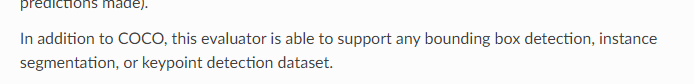

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
cfg.OUTPUT_DIR = './logs'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_0017009.pth")  
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator(data_test_name,tasks=("bbox",),output_dir="./dict_result4",use_fast_impl=True)
val_loader = build_detection_test_loader(cfg, data_test_name)
data = inference_on_dataset(predictor.model, val_loader, evaluator)
print(data)
with open('./data/dict_result4/SynTest1instance_4rthTrain_model_0017009_pth.json', 'w') as fp:
        json.dump(data, fp)

[10/21 07:39:10 d2.evaluation.coco_evaluation]: Trying to convert 'syn_testset' to COCO format ...
[10/21 07:39:10 d2.data.datasets.coco]: Converting annotations of dataset 'syn_testset' to COCO format ...)
[10/21 07:39:10 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[10/21 07:39:10 d2.data.datasets.coco]: Conversion finished, #images: 153, #annotations: 153
[10/21 07:39:10 d2.data.datasets.coco]: Caching COCO format annotations at './dict_result4/syn_testset_coco_format.json' ...
[10/21 07:39:10 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=800, sample_style='choice')]
[10/21 07:39:10 d2.data.common]: Serializing 153 elements to byte tensors and concatenating them all ...
[10/21 07:39:10 d2.data.common]: Serialized dataset takes 0.03 MiB
[10/21 07:39:10 d2.evaluation.evaluator]: Start inference on 153 batches


/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


[10/21 07:39:15 d2.evaluation.evaluator]: Inference done 11/153. Dataloading: 0.2849 s/iter. Inference: 0.0638 s/iter. Eval: 0.0002 s/iter. Total: 0.3489 s/iter. ETA=0:00:49
[10/21 07:39:20 d2.evaluation.evaluator]: Inference done 29/153. Dataloading: 0.2326 s/iter. Inference: 0.0649 s/iter. Eval: 0.0002 s/iter. Total: 0.2978 s/iter. ETA=0:00:36
[10/21 07:39:25 d2.evaluation.evaluator]: Inference done 46/153. Dataloading: 0.2364 s/iter. Inference: 0.0649 s/iter. Eval: 0.0002 s/iter. Total: 0.3016 s/iter. ETA=0:00:32
[10/21 07:39:30 d2.evaluation.evaluator]: Inference done 65/153. Dataloading: 0.2256 s/iter. Inference: 0.0650 s/iter. Eval: 0.0002 s/iter. Total: 0.2909 s/iter. ETA=0:00:25
[10/21 07:39:36 d2.evaluation.evaluator]: Inference done 82/153. Dataloading: 0.2299 s/iter. Inference: 0.0651 s/iter. Eval: 0.0002 s/iter. Total: 0.2953 s/iter. ETA=0:00:20
[10/21 07:39:41 d2.evaluation.evaluator]: Inference done 99/153. Dataloading: 0.2327 s/iter. Inference: 0.0660 s/iter. Eval: 0.000

### Tensorboard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/pharmacy/logs

In [ ]:
L=[1,2,3]
L[:3] 

[1, 2, 3]

### **Confusion Matrix**

In [ ]:
def showMatrix(M,txt):
  fig, ax = plt.subplots(figsize=(8, 8))
  class_name = ['cycloff', 'bibron', 'cortéma', 'laroche_posay', 'soulagel', 'sucette']
  
  ax.matshow(M, cmap=plt.cm.Blues)
  ax.set_xticks(np.arange(0, 6, 1))
  ax.set_yticks(np.arange(0, 6, 1))
  ax.set_xticklabels(class_name, rotation =70)
  ax.set_yticklabels(class_name, rotation =0)
  font= {'fontsize': 15,
    'fontweight':'normal',
    'color': 'black',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'}
  ax.set_title('Confusion Matrix'+ txt,fontdict= font , pad=70)
  for i in range(6):
      for j in range(6):
          c = M[i, j]
          ax.text(j, i, str(c), va='center', ha='center')

In [ ]:
def Confusion_matrix(model_name):
  cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
  cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR,model_name )
  #cfg.MODEL.WEIGHTS = "./model_0005247.pth"
  predictor = DefaultPredictor(cfg)
  M = np.zeros((6, 6), dtype=int)
  FN = np.zeros(6)
  for data in DatasetCatalog.get(data_test_name):
    im = cv2.imread(data["file_name"])
    outputs = predictor(im)
    preds_classes = outputs["instances"].pred_classes.to('cpu').tolist() #i
    gt_classes = [data["annotations"][0]["category_id"]] #j
    classes = preds_classes
    if len(preds_classes) == len(gt_classes):
      for i , j in zip(preds_classes , gt_classes):
      #j = gt_classes[0]
      #i = preds_classes[0]
        M[i,j]+=1
    elif len(preds_classes) != len(gt_classes): # in case multi preds multi gts use min(list_pred,list_gt) or i,j in zip(gt,pred)
      if gt_classes in preds_classes:
        for j in gt_classes:
          M[j,j]+=1
      elif preds_classes in gt_classes:
          #min(len(gt_classes),len(preds_classes))
        for i in preds_classes:
          M[i,i]+=1
      elif len(preds_classes) !=0:
        Min = min(len(gt_classes),len(preds_classes))
        for i,j in zip(preds_classes[:Min],gt_classes[:Min]):
          M[i,j]+=1
      else:
        if preds_classes == []:# case of pred_class = none or empty
          for j in gt_classes:
            FN[j]+=1
  return M,FN

In [ ]:
FN1

array([0., 0., 0., 0., 0., 0.])

In [ ]:
M , FN1 = Confusion_matrix("model_0017009.pth")

In [ ]:
FN1

array([0., 0., 0., 0., 0., 0.])

In [ ]:
detectron2.data.print_instances_class_histogram(dict_test, test_metadata.thing_classes)

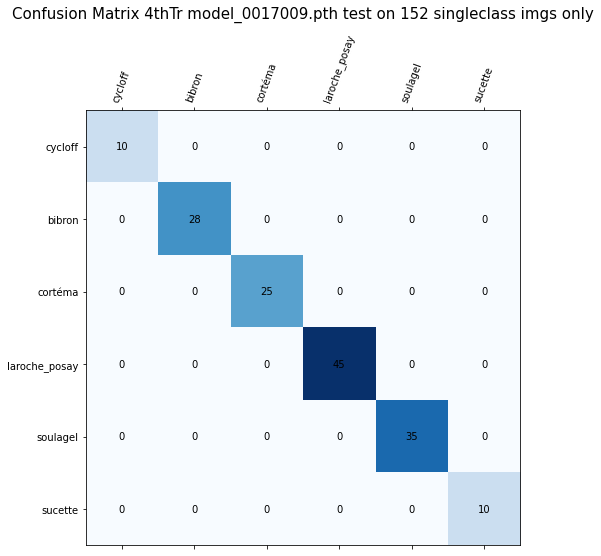

In [ ]:
showMatrix(M,' 4thTr model_0017009.pth test on 152 singleclass imgs only')

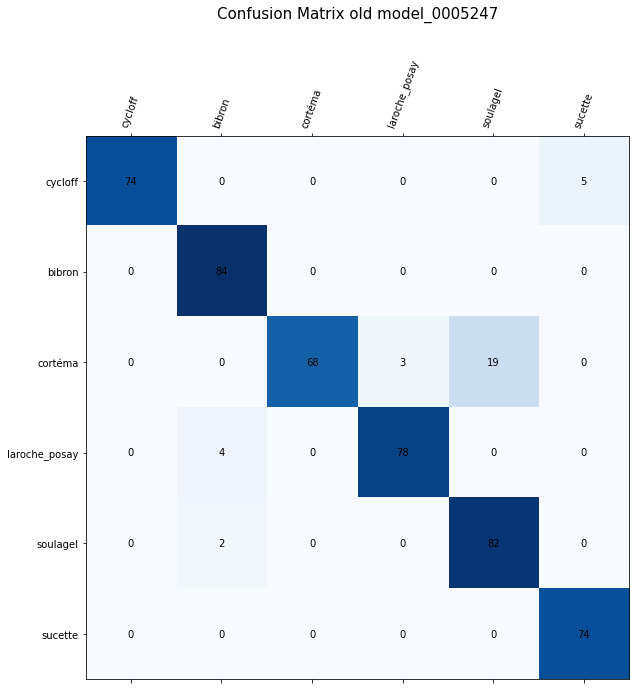

In [ ]:
showMatrix(M)

###  TP, FP, FN, F1- score from confusion matrix


In [ ]:
def class_stat(cat_id,M,FN1):
  #FN1 : non predicted objects counted as false negative for its class
  m,n= M.shape
  line=np.sum(M,axis=1)
  col=np.sum(M,axis=0)
  total=np.sum(M)
  TP = M[cat_id,cat_id] #scalar
  FP=line[cat_id]-TP #scalar
  FN2= col[cat_id]-TP
  FN = FN1[cat_id]+FN2
  TN= total-(TP+FP+FN)
  precision= TP/(TP+FP)
  recall= TP/(TP+FN)
  F1_score= (2*precision*recall)/(precision+recall)
  return TP ,FP ,FN ,TN, precision, recall, F1_score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


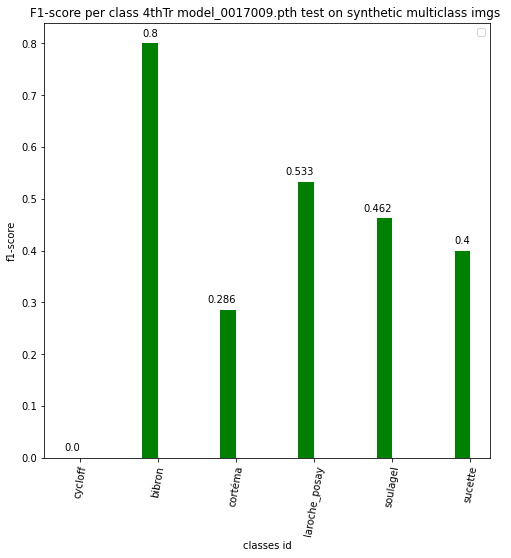

In [ ]:
#bar plot of f1_score per class
FS=np.zeros((6,))
R=np.zeros((6,))
for cat_id in range(6):  
  _,_,_,_,_,_, F1_score = class_stat(cat_id,M, FN1)
  FS[cat_id] = round(F1_score,3)

'''
for cat_id in range(6):  
  _,_,_,_,_,recall,_ = class_stat(cat_id,M)
  R[cat_id] = round(recall,3)
'''
    
fig = plt.figure(figsize = (8, 8))
class_name = ['cycloff', 'bibron', 'cortéma', 'laroche_posay','soulagel', 'sucette']
# creating the bar plot
bins = np.arange(1,7,1,dtype=float)
FS=np.nan_to_num(FS)

plt.bar(bins-0.1, FS, color ='green', width = 0.2,)
#plt.bar(bins+0.1, R, color ='blue', width = 0.2, label='328')

for index,value in enumerate(FS):
  plt.text(x=int(index)+1 , y =value+0.01,s=f"{value}",fontdict=dict(fontsize=10),ha='right', va='bottom')

#for index,value in enumerate(R):
#  plt.text(x=int(index)+1 , y =value+0.01,s=f"{value}",fontdict=dict(fontsize=10),ha='left', va='bottom')
    
plt.xlabel("classes id")
plt.xticks(bins, class_name, rotation =80)
plt.ylabel("f1-score")
plt.legend()
plt.title("F1-score per class 4thTr model_0017009.pth test on synthetic multiclass imgs ")
plt.show()

In [ ]:
#cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
#cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_0012459.pth") 
for data in dict_test:
  im = cv2.imread(data["file_name"])
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                      MetadataCatalog.get(cfg.DATASETS.TEST[0]),
                      scale=1,
                      instance_mode=ColorMode.SEGMENTATION)
  classes = outputs["instances"].pred_classes.to('cpu').tolist() #i
  gt_classes = [data["annotations"][0]["category_id"]] #j
    
  boxes = v._convert_boxes(outputs["instances"].pred_boxes.to('cpu')).squeeze()
  scores = outputs["instances"].scores.to('cpu').tolist()
  labels = _create_text_labels(classes, scores, ['cycloff', 'bibron', 'cortéma', 'laroche_posay','soulagel', 'sucette'])
  #if len(classes) != 1 and sum(classes)//2 != gt_classes[0] :
  if len(classes) != 1 and gt_classes[0] == 2 and 3 in classes:
    for box, label in zip(boxes, labels):
        color = random_color(rgb=True, maximum=1)
        color = v._change_color_brightness(color, 0.5)
        out = v.draw_box(box, edge_color=color)
        out = v.draw_text(
            f"{label}", (box[0]+(box[2]-box[0])/2, box[1]), horizontal_alignment="center", font_size=45)
    img = cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(img)


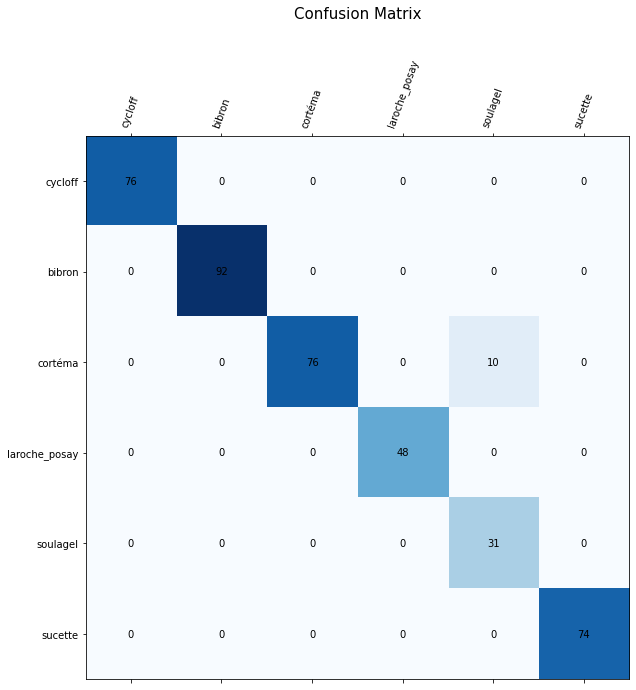

In [ ]:
showMatrix(M)

In [ ]:
print('total number of predicted instances:',sum(M))

In [ ]:
from zipfile import ZipFile
zf = ZipFile('./mixed_images.zip', 'r')
zf.extractall('./data/visual_test_imgs/random_tests/')
zf.close()

### validation and train AP curves

In [ ]:
#/content/drive/MyDrive/pharmacy/logs
data_j= pd.read_json("./logs/metrics.json",lines=True)
#with open("./logs/metrics.json",'r') as rd:
#  data_j = json.load(rd)

In [ ]:
len(data_j['iteration'])

1074

In [ ]:
data_j['iteration'][1073]

21470

In [ ]:
data_j.head()


,data_time,eta_seconds,fast_rcnn/cls_accuracy,fast_rcnn/false_negative,fast_rcnn/fg_cls_accuracy,iteration,loss_box_reg,loss_cls,loss_rpn_cls,loss_rpn_loc,lr,roi_head/num_bg_samples,roi_head/num_fg_samples,rpn/num_neg_anchors,rpn/num_pos_anchors,time,total_loss
0,3.334443,87572.739792,0.052002,0.016258,0.182956,19,0.539605,1.969808,0.005236,0.005072,0.00002,110.156250,17.843750,251.843750,4.156250,4.082455,2.521309
1,3.176077,86916.720135,0.856445,0.667961,0.023051,39,0.516804,1.212068,0.005119,0.004894,0.00004,110.453125,17.546875,251.859375,4.140625,3.965574,1.720930
2,3.159652,86082.889166,0.856323,1.000000,0.000000,59,0.547042,0.543676,0.005811,0.004725,0.00006,109.609375,18.390625,251.656250,4.343750,3.955504,1.103020
3,3.151643,85255.373583,0.849854,1.000000,0.000000,79,0.568832,0.435948,0.003235,0.004317,0.00008,108.781250,19.218750,252.046875,3.953125,3.944810,1.026119
4,3.163525,85091.014985,0.838379,0.997655,0.000000,99,0.605092,0.417501,0.001604,0.003875,0.00010,107.296875,20.703125,251.812500,4.187500,3.951004,1.032678


In [ ]:
os.listdir("/content/drive/MyDrive/pharmacy/logs/")

In [ ]:
chekpt_names = []
for f in os.listdir("/content/drive/MyDrive/pharmacy/logs/"):
  if f.startswith('model'):
    chekpt_name=f.split('/')[-1]
    chekpt_name.replace('model_','').replace(".pth","")
    chekpt_names.append(chekpt_name)
#indx= chekpt_names.index('final')
#chekpt_names.pop(indx)

In [ ]:
len(chekpt_names)

73

In [ ]:
accuracy =[]
for a in sorted(chekpt_names):
  accuracy.append(data_j["fast_rcnn/cls_accuracy"][a])

In [ ]:
print(data_j['iteration']=='0095108')
lst= [int(a) for a in chekpt_names]
lst=sorted(lst)